In [237]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [316]:
dtypes_dict = {'created':'str', 'application_id': 'category', 'ref_type': 'category', 'device_brand': np.float32, \
                'device_countrycode': 'category',  'session_user_agent': 'category', 'click_hash': np.float16, \
                'kind': 'category', 'device_languaje': 'category'}
installs = pd.read_csv('data/train_installs.csv.gzip', dtype=dtypes_dict)
#installs.drop('click_hash', axis=1, inplace=True) # Elimino esta columna por tener todos Nan
installs.drop('trans_id', axis=1, inplace=True) #solo 6 columnas con datos y no son revelantes
installs['created'] = pd.to_datetime(installs['created'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
installs['ref_type'] = installs['ref_type'].astype('category')

In [ ]:
# session_user_agent hay valores que solo tienen 1 frecuencia pero son similares, los agrupo
# para poder trabajar mejor con esos datos
installs.loc[installs['session_user_agent'].str[:7] == 'Mozilla', 'session_user_agent'] = 'Mozilla 5.0'
installs['session_user_agent'] = installs['session_user_agent'].astype('category')

In [ ]:
installs['device_countrycode'] = installs['device_countrycode'].astype('category')

In [ ]:
installs['application_id'] = installs['application_id'].astype(np.int8)

In [105]:
installs['kind'].value_counts()

af_app_opened                 428
EVENT_OPEN_APP                303
EVENT_HOMEPAGE                 76
login_success                  17
account_summary_first_step     13
EVENT_LISTINGVIEW_FLIGHT        6
deeplink                        5
reattribution                   4
registration                    3
payment method add              3
journey first drop off          2
journey reserved                1
journey drop off                1
af_list_view                    1
install                         1
EVENT_PROMO                     1
Name: kind, dtype: int64

In [ ]:
installs.loc[installs['kind'] == 'Open', 'kind'] = 'EVENT_OPEN_APP'
installs.loc[installs['kind'] == 'app_open', 'kind'] = 'EVENT_OPEN_APP'
installs.loc[installs['kind'] == 'open', 'kind'] = 'EVENT_OPEN_APP'
installs.loc[installs['kind'] == 'EVENT_Homepage', 'kind'] = 'EVENT_HOMEPAGE'

In [ ]:
installs['attributed'].value_counts()

In [8]:
installs.dtypes

created               datetime64[ns]
application_id                 int64
ref_type                       int64
ref_hash                       int64
attributed                      bool
implicit                        bool
device_countrycode             int64
device_brand                 float64
device_model                 float64
session_user_agent            object
user_agent                    object
event_uuid                    object
kind                          object
wifi                          object
ip_address                     int64
device_language              float64
dtype: object

In [104]:
installs.head()

,created,application_id,ref_type,ref_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,EVENT_OPEN_APP,NaN,4636407223847323867,3.301378e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,EVENT_OPEN_APP,NaN,685400811232710215,3.301378e+18


In [3]:
installs.isnull().sum()

created                  0
application_id           0
ref_type                 0
ref_hash                 0
attributed               0
implicit                 0
device_countrycode       0
device_brand          2365
device_model             1
session_user_agent      48
user_agent            1683
event_uuid            2547
kind                  2547
wifi                  1683
trans_id              3406
ip_address               0
device_language         34
dtype: int64

In [12]:
installs['ref_type'].value_counts()

1891515180541284343    2080
1494519392962156891    1332
Name: ref_type, dtype: int64

In [37]:
installs.loc[installs['device_model'].isnull()]

,created,application_id,ref_type,ref_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
2157,2019-03-09 16:08:19.919,30,1494519392962156891,4364935818432173881,False,True,6333597102633388268,NaN,NaN,HasOffers Mobile AppTracking v1.0,NaN,78082c4c-0fe1-4fc7-a718-4eba1d943b9c,Open,NaN,NaN,2208800741316080623,NaN


In [119]:
group1 = installs.groupby(['ref_type','device_countrycode'])['device_countrycode'].count().unstack()
group1

device_countrycode,2970470518450881158,6333597102633388268
ref_type,,
1494519392962156891,487,845
1891515180541284343,1105,975


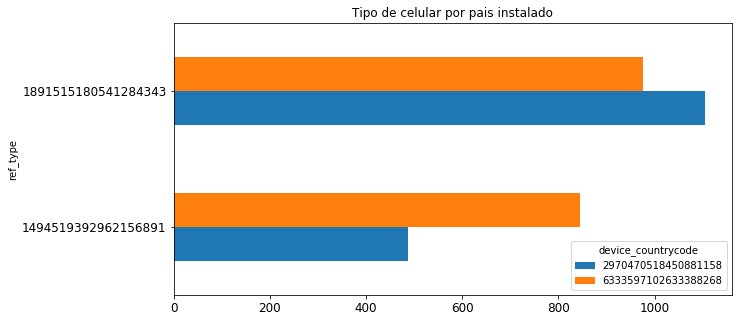

In [120]:
group1.plot(kind='barh', title ="Tipo de celular por pais instalado", figsize=(10, 5), \
                      legend=True, fontsize=12)

In [83]:
group2 = installs.groupby(['device_countrycode', 'session_user_agent']).count()['created']
group2

device_countrycode   session_user_agent               
2970470518450881158  HasOffers Mobile AppTracking v1.0       NaN
                     Mozilla 5.0                             NaN
                     adjust.com                           1592.0
                     http-kit/2.0                            NaN
6333597102633388268  HasOffers Mobile AppTracking v1.0      22.0
                     Mozilla 5.0                            21.0
                     adjust.com                              NaN
                     http-kit/2.0                         1729.0
Name: created, dtype: float64

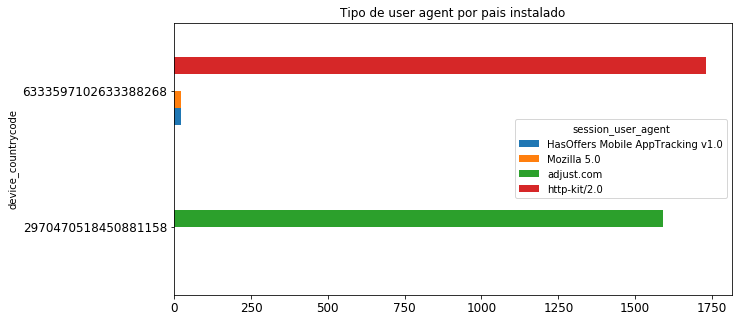

In [84]:
group2.unstack().plot(kind='barh', title ="Tipo de user agent por pais instalado", figsize=(10, 5), \
                      legend=True, fontsize=12)

Text(0, 0.5, 'Cantidad de instalaciones')

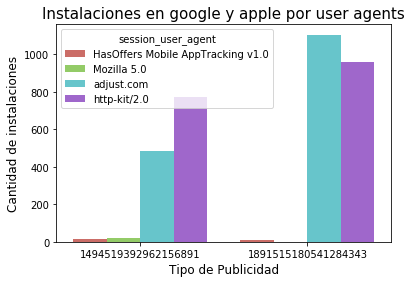

In [296]:
g5 = sns.countplot(x='ref_type', data=installs, palette='hls', hue='session_user_agent', hue_order=)
g5.set_title("Instalaciones en google y apple por user agents", fontsize =15)
g5.set_xlabel("Tipo de Publicidad", fontsize = 12)
g5.set_ylabel("Cantidad de instalaciones", fontsize = 12)

In [32]:
#auctions.loc[auctions['application_id'] == 28].T #"Dalvik", tambien 2, 4, 10,14,16,28
#installs.loc[installs['application_id'] == 15] # nextgen
#auctions.loc[auctions['application_id'] ==9] #mercadopago
#auctions.loc[auctions['application_id'] ==21] #peixelUrbano
#installs.loc[installs['application_id'] ==23] #takealot
#auctions.loc[auctions['application_id'] ==24] #hotelurbano

In [287]:
group4 = installs.groupby(['device_countrycode', 'device_language']).count()
#group4.reset_index()

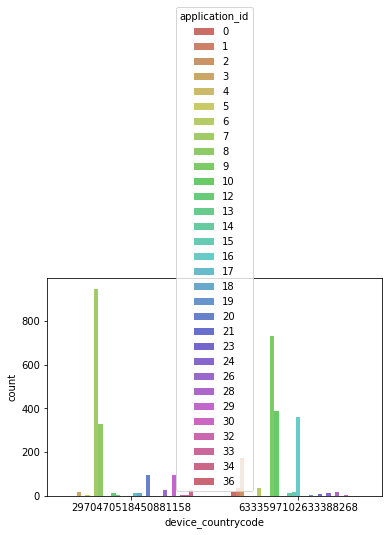

In [289]:
#group4.unstack().plot.bar()
g5 = sns.countplot(x='device_countrycode', data=installs, palette='hls', hue='application_id',  )
g5

Text(0, 0.5, 'Cantidad de Instalaciones')

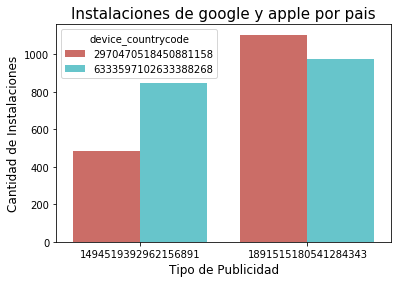

In [156]:
g5 = sns.countplot(x='ref_type', data=installs, palette='hls', hue='device_countrycode')

g5.set_title("Instalaciones de google y apple por pais", fontsize =15)
g5.set_xlabel("Tipo de Publicidad", fontsize = 12)
g5.set_ylabel("Cantidad de Instalaciones", fontsize = 12)

In [307]:
# Todos los valores son de marzo 2019 de las semanas 10 y 11
installs['day'] = pd.DatetimeIndex(installs['created']).day;
installs['weekday'] = pd.DatetimeIndex(installs['created']).weekday;
installs['hour'] = pd.DatetimeIndex(installs['created']).hour;

weekdays = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
installs['weekday'].replace(weekdays, inplace=True)

Text(51.0, 0.5, 'Hora')

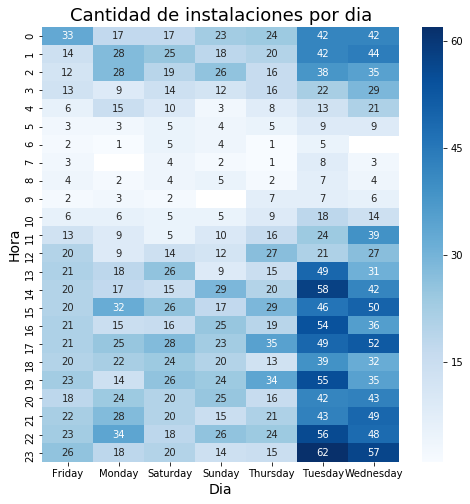

In [311]:
g = installs.groupby(['hour', 'weekday'])['weekday'].count().unstack()
plt.figure(figsize=(8, 8))
heap_map = sns.heatmap(g, cbar=True, cmap="Blues", annot=True)
heap_map.set_title("Cantidad de instalaciones por dia", fontsize=18)
heap_map.set_xlabel("Dia", fontsize=14)
heap_map.set_ylabel("Hora", fontsize=14)

In [11]:
installs.columns

Index(['created', 'application_id', 'ref_type', 'ref_hash', 'attributed',
       'implicit', 'device_countrycode', 'device_brand', 'device_model',
       'session_user_agent', 'user_agent', 'event_uuid', 'kind', 'wifi',
       'trans_id', 'ip_address', 'device_language'],
      dtype='object')